## DataViz Lab

Business Questions:

* Which month generates the most sales?
* Which sales person sold the most cars?
* Which dealer sold the most cars?
* In what year was the average price of a corvette greater than 100k?
* Which car has several points in the box plots upper right quartile for the engine's horse power?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cardata.csv')

In [3]:
df.head()

,car,year,engine_hp,avg_mpg,price,salesman,dealership,sold_date,sold_month
0,Corvette,2011,335.0,22.5,46135,2,Big Bobs,2012-05-06,5
1,Corvette,2011,300.0,23.5,40650,2,Uptown Cars,2011-05-16,5
2,Corvette,2011,300.0,24.0,36350,2,Uptown Cars,2013-07-31,7
3,Corvette,2011,230.0,23.0,29450,2,Uptown Cars,2014-07-05,7
4,Corvette,2011,230.0,23.0,34500,2,Uptown Cars,2013-05-20,5


## Which month generated the most sales?

In [9]:
g = df.groupby('sold_month')[['car']].count()

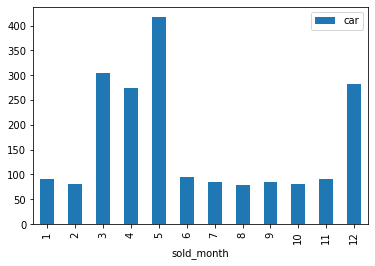

In [13]:
g.plot.bar()

## Which sales person sold the most cars?

In [16]:
True

True

In [21]:
g = df.groupby('salesman')[['salesman']].count()

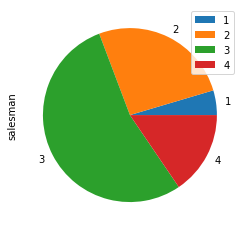

In [22]:
g.plot.pie(y='salesman')

In [36]:
g = df.groupby(['salesman','car'])[['car']].count()

In [37]:
g

car
salesman car          
1        Camaro     32
         Corvette   12
         Mustang    46
2        Camaro    185
         Corvette  102
         Mustang   226
3        Camaro    412
         Corvette  172
         Mustang   470
4        Camaro    117
         Corvette   48
         Mustang   139

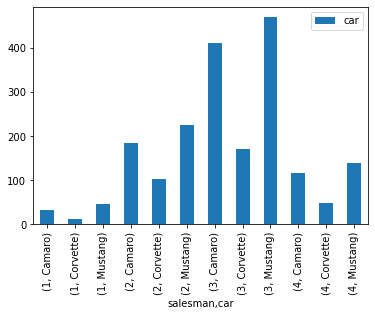

In [38]:
g.plot.bar()

## Which dealer sold the most cars

In [41]:
g = df.groupby(['dealership'])[['dealership']].count()

In [42]:
g

,dealership
dealership,
Big Bobs,277
Car Town,672
Uptown Cars,1012


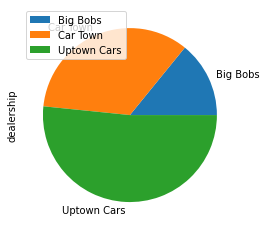

In [43]:
g.plot.pie(y='dealership')

## In what year was the average price of a corvette greater than 100k?

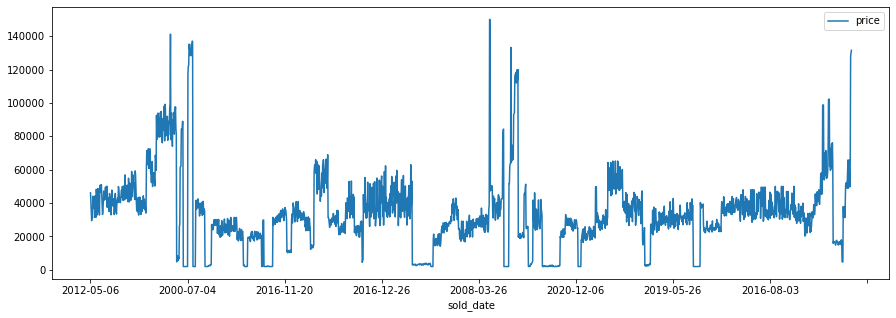

In [47]:
df.plot(x='sold_date',y='price', figsize=(15,5))

In [52]:
df.loc[df['car']=='Corvette']

,car,year,engine_hp,avg_mpg,price,salesman,dealership,sold_date,sold_month
0,Corvette,2011,335.0,22.5,46135,2,Big Bobs,2012-05-06,5
1,Corvette,2011,300.0,23.5,40650,2,Uptown Cars,2011-05-16,5
2,Corvette,2011,300.0,24.0,36350,2,Uptown Cars,2013-07-31,7
3,Corvette,2011,230.0,23.0,29450,2,Uptown Cars,2014-07-05,7
4,Corvette,2011,230.0,23.0,34500,2,Uptown Cars,2013-05-20,5
...,...,...,...,...,...,...,...,...,...
1956,Corvette,2016,240.0,28.0,49700,4,Uptown Cars,2019-09-09,9
1957,Corvette,2016,335.0,20.5,66350,2,Car Town,2017-04-29,4
1958,Corvette,2001,394.0,15.5,128000,4,Uptown Cars,2002-05-15,5
1959,Corvette,2002,394.0,15.5,130000,2,Uptown Cars,2002-05-07,5


In [59]:
p = df.loc[df['car']=='Corvette'].groupby(['year'])['price'].mean()
p

year
1995      6376.666667
1996      6317.000000
1997      7158.500000
2000      4809.333333
2001     54313.333333
2002     56378.000000
2003    134200.000000
2006     50300.000000
2007     51100.000000
2008     51400.000000
2010     88900.000000
2011     45997.500000
2012     37875.000000
2013     44166.666667
2014     93730.000000
2015     65173.786408
2016     61910.806452
2017     63196.835443
Name: price, dtype: float64

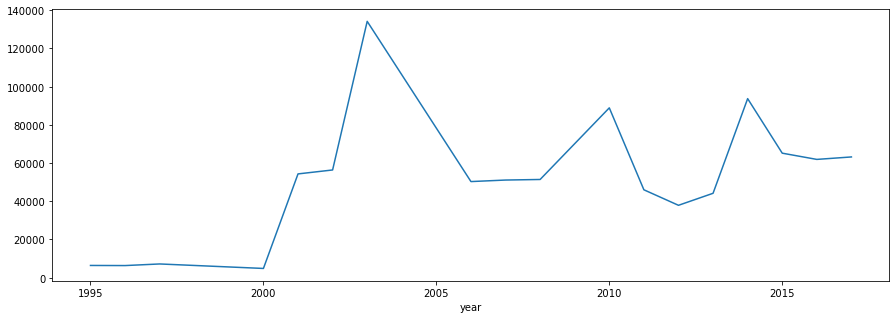

In [60]:
p.plot(x='year',y='price', figsize=(15,5))

## Which car has several points in the box plots upper right quartile for the engine's horse power?

In [61]:
df_vet = df[df['car'] == 'Corvette']
df_mustang = df[df['car'] == 'Mustang']
df_camaro = df[df['car'] == 'Camaro']

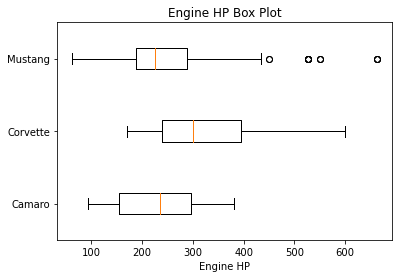

In [63]:
data = [df_camaro['engine_hp'], df_vet['engine_hp'], df_mustang['engine_hp']]
plt.boxplot(data, vert=False)
plt.title('Engine HP Box Plot')
plt.xlabel('Engine HP')
plt.yticks([1, 2, 3], ['Camaro', 'Corvette', 'Mustang'])
plt.show()